In [4]:
import pandas as pd
from src.data.metrics import  get_metrics
import matplotlib.pyplot as plt

In [5]:
hparams = [
    "model_cls",
    "lr",
    "n_hidden",
    "n_layers",
    "embedding_type",
    "loc_levels",
    "time_levels",
    "time_embedding_factor",
    "dropout",
]
metrics = [
    "macro_f1",
    "top_5_accuracy",
    "top_1_accuracy",
]

In [6]:
df = pd.read_json("../reports/time_grid.jsonl", lines=True)
get_metrics(df, metrics)

In [8]:
dfm

,loc_levels,time_levels,model_cls,time_embedding_factor,mean,std
0,4,1,BiTULER,0.0625,0.805080,0.000608
1,4,1,BiTULER,0.1250,0.802343,0.000898
2,4,2,BiTULER,0.0625,0.805553,0.000435
3,4,2,BiTULER,0.1250,0.801701,0.000919
4,4,3,BiTULER,0.0625,0.805413,0.000853
5,4,3,BiTULER,0.1250,0.802703,0.000424
6,4,4,BiTULER,0.0625,0.805260,0.001548
7,4,4,BiTULER,0.1250,0.802016,0.001142


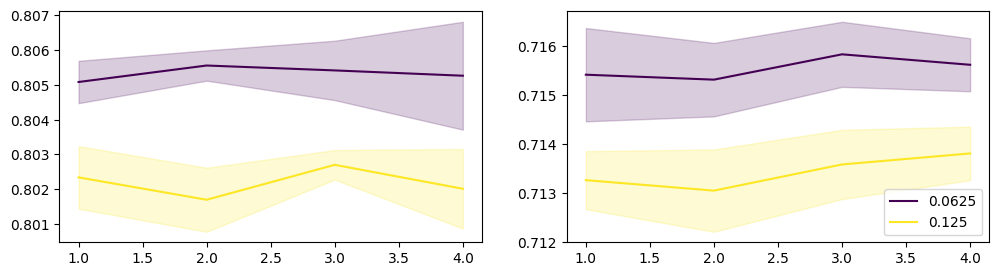

In [9]:
model = "BiTULER"
# dfm = df[(df["model_cls"] == model)]
fig, axs = plt.subplots(ncols=2, figsize=(12, 3))
for col_idx, metric in enumerate(["top_5_accuracy", "top_1_accuracy"]):
    ax = axs[col_idx]
    dfm = (
        df.groupby(
            ["loc_levels", "time_levels", "model_cls", "time_embedding_factor"]
        )[metric]
        .agg(["mean", "std"])
        .reset_index()
    )
    cmap = plt.get_cmap("viridis", 2)
    colors = cmap(range(2))

    for idx, (time_factor, df_line) in enumerate(dfm.groupby("time_embedding_factor")):
        x = df_line["time_levels"]
        y = df_line["mean"]
        err = df_line["std"]
        color = colors[idx]
        ax.plot(x, y, label=time_factor, color=color)
        ax.fill_between(x, y - err, y + err, alpha=0.2, color=color)
ax.legend()